In [2]:
import pathlib
import functools

import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

sns.set()

We begin by reading the data and summarizing the variables.

In [6]:
path = pathlib.Path.home() / 'data' / 'sleuth3' / 'case0401.csv'
df = pd.read_csv(path)
df


,Incidents,Launch
0,1,Cool
1,1,Cool
2,1,Cool
3,3,Cool
4,0,Warm
5,0,Warm
6,0,Warm
7,0,Warm
8,0,Warm
9,0,Warm


In [7]:
summary = df.groupby('Launch').describe()                                    
summary

Incidents                                        
           count mean       std  min  25%  50%  75%  max
Launch                                                  
Cool         4.0  1.5  1.000000  1.0  1.0  1.0  1.5  3.0
Warm        20.0  0.2  0.523148  0.0  0.0  0.0  0.0  2.0

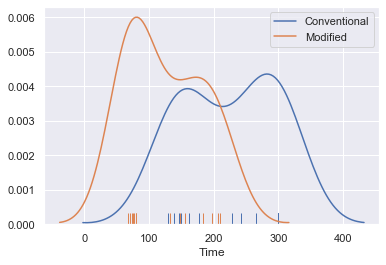

In [20]:
blue, orange = sns.color_palette()[:2]
sns.distplot(df.loc[df.Treatment == 'Conventional', 'Time'], rug=True, hist=False, label='Conventional', color=blue)
sns.distplot(df.loc[df.Treatment == 'Modified', 'Time'], rug=True, hist=False, label='Modified', color=orange)
plt.legend()

In [21]:
df['Order'] = df['Time'].rank() 
summary = df.groupby('Treatment').describe()                                    
summary.loc[:, 'Order']

,count,mean,std,min,25%,50%,75%,max
Treatment,,,,,,,,
Conventional,14.0,19.214286,6.795684,8.0,13.50,21.50,26.00,26.0
Modified,14.0,9.785714,6.758796,1.0,4.25,7.75,16.25,20.0


In [23]:
rbar = df.describe().loc['mean', 'Order']                                          
sr = df.describe().loc['std', 'Order']                                             
n1 = summary.loc['Conventional', ('Time', 'count')]                                
n2 = summary.loc['Modified', ('Time', 'count')]                                    
mean_t = n1 * rbar                                                                 
sd_t = sr * np.sqrt(n1 * n2 / (n1 + n2))                                           
T = df.groupby('Treatment').sum().loc['Modified', 'Order']                         
                                                                                   
z = ((T + 0.5) - n1 * rbar) / sd_t                                                 
p = scipy.stats.norm.cdf(z)                                                        
print(z, p)  

-3.0182586987742126 0.0012711588792242423


The one-sided p-value is 0.001.  Alternatively we can use the Mann-Whitney Rank Test as follows:

In [24]:
x = df.loc[df.Treatment == 'Conventional', 'Order']
y = df.loc[df.Treatment == 'Modified', 'Order']
scipy.stats.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=32.0, pvalue=0.0012711588792242423)

The one-sided p-value agrees, although the statistic is different.